In [19]:
!pip3 install matplotlib
!pip3 install wordcloud
!pip3 install nltk
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the &#39;c:\program files (x86)\python38-32\python.exe -m pip install --upgrade pip&#39; command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the &#39;c:\program files (x86)\python38-32\python.exe -m pip install --upgrade pip&#39; command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the &#39;c:\program files (x86)\python38-32\python.exe -m pip install --upgrade pip&#39; command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the &#39;c:\program files (x86)\python38-32\python.exe -m pip install --upgrade pip&#39; command.


In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manuela\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manuela\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from glob import glob as gg
import string
from pathlib import Path
import os
from collections import Counter
from matplotlib.backends.backend_pdf import PdfPages
import pandas

In [4]:
def create_word_cloud(name, info, words):   
   wordcloud = WordCloud(width=1200, height=480).generate(words)   
   fig = plt.figure( figsize=(20,10) )
   plt.imshow(wordcloud, interpolation='bilinear')
   plt.axis("off")
   plt.suptitle(name,fontsize = 20, y=0.88)
   plt.title(info,fontsize = 12)
   plt.savefig(name + '.png', bbox_inches='tight')
   plt.close(fig)
   return fig


In [5]:
def normalize(text):
  tokens = word_tokenize(text)
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  words = [word for word in stripped if word.isalpha()]
  stop_words = set(stopwords.words('portuguese'))
  stop_words = stop_words.union(['campinas','municipal','ser','município','ações', 'gestão','cidade','cidades','governo','pública','público','forma','todos', 'áreas','acesso','uso','sobre','número','programa','sistema','meio', 'prefeitura','secretaria','processo'])
  words = [w for w in words if not w in stop_words]
  return TreebankWordDetokenizer().detokenize(words)

In [6]:
pdf = PdfPages('report.pdf')

In [7]:
dataset = ""
d = Path().resolve().parent
for txt in gg(str(d)+'\data\*.txt'):
  file = open(txt, encoding="utf8").read()
  dataset += file.lower()
  normalized = normalize(dataset)

In [8]:
infoTodos = {}
infoTodos['fileName'] = "Todas as propostas"
infoTodos['wordsCount'] = len(dataset)
infoTodos['wordCountNormalized'] = len(normalized.split()) 

In [9]:
figTodos = create_word_cloud("Todos", infoTodos, normalized)

In [10]:
pdf.savefig(figTodos)

In [11]:
ds=""
fileInfo = []
for txt in gg(str(d)+'\data\*.txt'):
  info = {}
  name = str(os.path.basename(txt))  
  file = open(txt, encoding="utf8").read()  
  info['fileName'] = name  
  ds = file.lower()
  info['wordCount'] = len(ds)
  n = normalize(ds) 
  info['wordCountNormalized'] = len(n.split())  
  figFile = create_word_cloud(name.replace(".txt", ""),info, n)
  pdf.savefig(figFile)
  info['dataset'] = n
  fileInfo.append(info)

In [12]:
pdf.close()

In [13]:
top_words = Counter(normalized.split()).most_common(100)
f = open("word-ranking-100.txt", "w")
for word, frequency in top_words:
    f.write("%s %d \n" % (word, frequency))
    print("%s %d" % (word, frequency))
f.close()

saúde 569
social 454
educação 418
desenvolvimento 381
serviços 366
pessoas 321
população 303
transporte 253
segurança 245
recursos 242
públicos 238
plano 235
políticas 222
qualidade 222
empresas 204
públicas 201
atividades 199
trabalho 199
planejamento 198
programas 196
cultura 184
escolas 180
ampliar 179
vida 178
anos 176
através 173
administração 173
política 172
assistência 168
rede 167
renda 165
ensino 164
participação 163
maior 161
municipais 160
região 157
garantir 155
atendimento 155
sociedade 154
área 152
promover 148
profissionais 148
processos 146
urbana 145
criar 143
além 142
objetivo 141
sociais 137
deficiência 135
ainda 133
criação 133
implantação 132
cada 130
todas 128
crianças 128
lei 127
promoção 126
outras 125
projetos 123
bem 121
outros 121
economia 120
infraestrutura 120
tecnologia 120
condições 119
estado 118
esporte 116
deve 115
direitos 114
culturais 113
equipamentos 113
brasil 113
mobilidade 108
controle 107
federal 106
unidades 106
sustentável 106
saneamento 105

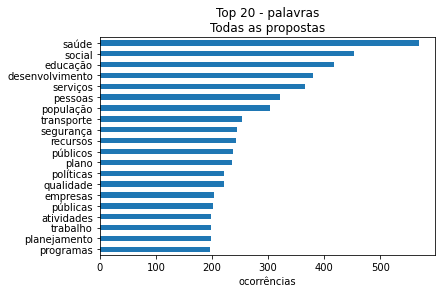

In [35]:
wordRank = dict(Counter(normalized.split()).most_common(20))
df = pandas.DataFrame.from_dict(wordRank, orient='index')
df.plot.barh(title='Top 20 - palavras\nTodas as propostas',legend=0).invert_yaxis()
plt.xlabel('ocorrências')
plt.show()